Collect Time Series data for a location

In [ ]:
# https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/56.224051%252C-5.2130074/2019-05-03/2022-02-15?include=fcst%2Cobs%2Chistfcst%2Cstats%2Cdays&key=6FF9G8N2T2NZCSR2C2WPZ42QF&options=preview&contentType=json
import json
import requests
import pandas as pd
import numpy as np

API_KEY = '6FF9G8N2T2NZCSR2C2WPZ42QF'
WEATHER_endpoint = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/'
desired_features = ['temp','visibility','wspd','cloudcover','precip','sealevelpressure','dew','wgust','humidity']

def getTimeSeries(latitudes,longitudes,dateStart,dateEnd):
    query_params = '{},{}/{}/{}?unitGroup=metric&elements=datetime%2Ctemp%2Cdew%2Chumidity%2Cprecip%2Cwindgust%2Cwindspeed%2Cpressure%2Ccloudcover%2Cvisibility&include=stats&key={}&contentType=json'
    query_params=query_params.format(latitudes,longitudes,dateStart,dateEnd,API_KEY)
    try:
        r = requests.get(WEATHER_endpoint + query_params,verify = False)
        weatherInfo = r.json()
    except Exception:
        weatherInfo = []
        print('Problem loading weather data for query params' + query_params +"\n"+ Exception)
    if weatherInfo:
        timeSeries = pd.DataFrame(weatherInfo['days'])
        statsSeries = (pd.DataFrame(list(timeSeries['normal'])))
        timeSeries = timeSeries.drop('normal',axis=1)
        timeSeries['windgust'].replace(np.NaN, 0, inplace=True)
    else:
        print('error')
    timeSeries.to_csv('../Data/TimeSeriesOfLocations/' + str(latitudes) + '_' + str(longitudes) + '.csv')
    statsSeries.to_csv('../Data/TimeSeriesOfLocations/MinMeanMax_' + str(latitudes) + '_' + str(longitudes) + '.csv')

# getTimeSeries(56.224051,-5.2130074,'2019-08-01','2022-01-31')

Plot Raw Graph

     Unnamed: 0   datetime  temp   dew  humidity  precip  windgust  windspeed  \
0             0 2019-08-01  15.5  12.2      81.5     0.0       0.0       15.5   
1             1 2019-08-02  15.9  12.0      78.4     0.0      51.8       21.6   
2             2 2019-08-03  15.4  12.4      83.0     0.0      51.1       20.2   
3             3 2019-08-04  15.9  12.8      83.1     0.0      38.9       20.9   
4             4 2019-08-05  16.0  12.8      81.8     0.0       0.0       19.4   
..          ...        ...   ...   ...       ...     ...       ...        ...   
910         910 2022-01-27   5.6   3.0      84.5     0.0      55.4       23.4   
911         911 2022-01-28   5.2   2.2      81.4     0.1      55.4       31.7   
912         912 2022-01-29   5.2   2.2      81.9     0.0      96.5       25.6   
913         913 2022-01-30   4.9   2.0      82.4     0.0      80.3       31.7   
914         914 2022-01-31   5.2   3.1      87.1     0.0      61.2       27.4   

     pressure  cloudcover  

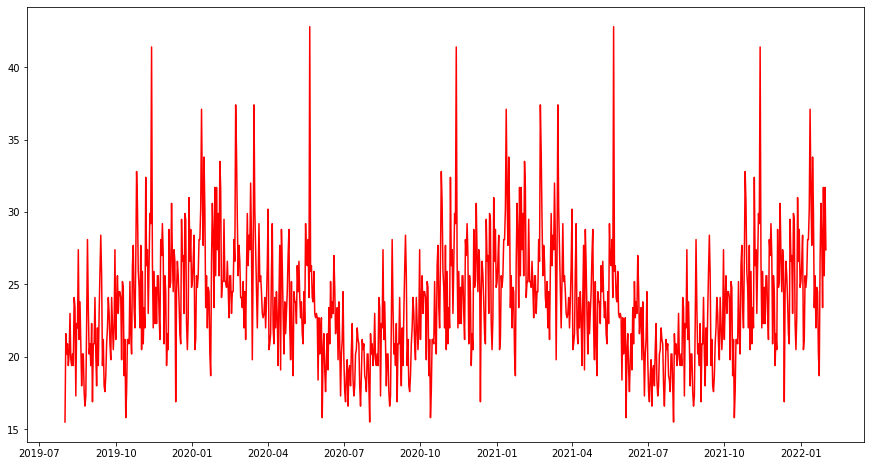

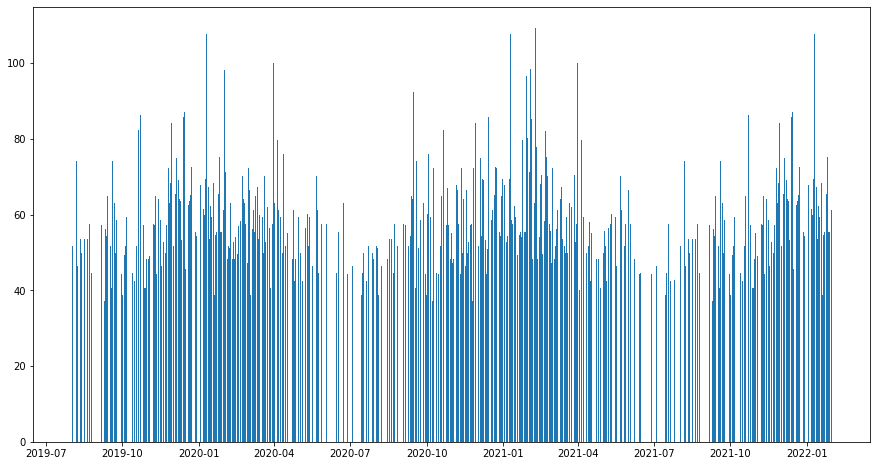

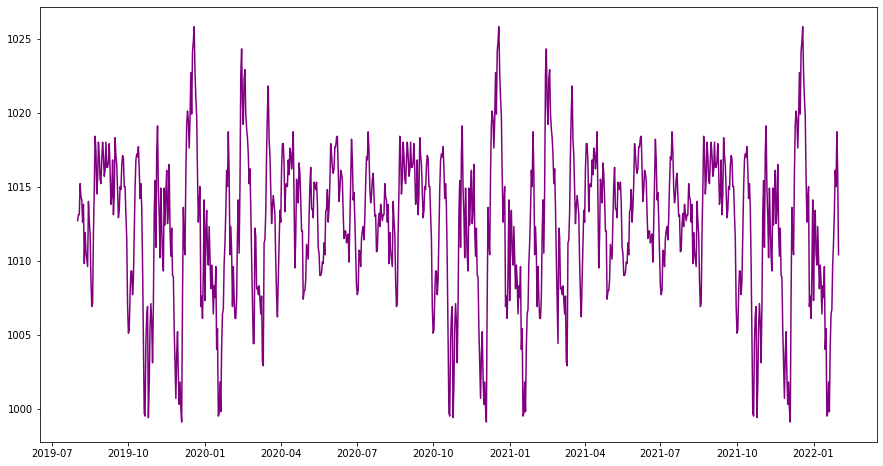

In [35]:
from matplotlib import pyplot as plt

dataset = pd.read_csv('../Data//TimeSeriesOfLocations/56.224051_-5.2130074.csv',parse_dates=["datetime"])
print(dataset)
plt.figure(figsize=(15, 8))
plt.plot(dataset['datetime'],dataset['windspeed'],color='red')
plt.figure(figsize=(15, 8))
plt.bar(dataset['datetime'],dataset['windgust'])
plt.figure(figsize=(15, 8))
plt.plot(dataset['datetime'],dataset['pressure'],color='purple')

In [100]:
dataset = pd.read_csv('../Data//TimeSeriesOfLocations/MinMeanMax_56.224051_-5.2130074.csv')
print(dataset.windspeed.apply(lambda x: x.split(',')[0].replace('[','').replace(']','')))


0       0.0
1       9.4
2       0.0
3       3.6
4       5.4
       ... 
910     0.0
911     0.0
912     5.4
913     3.6
914    10.1
Name: windspeed, Length: 915, dtype: object


Smooth with average window

In [189]:
from ipywidgets import interact

dataset = pd.read_csv('../Data//TimeSeriesOfLocations/56.224051_-5.2130074.csv',parse_dates=["datetime"])
# print(dataset)
# feature = 'windspeed'
@interact(alpha=(1,1000),feature=['windspeed','windgust','pressure','temp','dew','cloudcover','visibility'])
def graphdraw(alpha,feature):
    rawwindspeedData = dataset[['datetime',feature]]
    plt.figure(figsize=(15, 8))
    plt.scatter(dataset['datetime'],dataset[feature],color='red',marker='x')
    smoothedData = rawwindspeedData.ewm(alpha=alpha/1000).mean()
    plt.plot(dataset['datetime'],smoothedData[feature],color='black')

interactive(children=(IntSlider(value=500, description='alpha', max=1000, min=1), Dropdown(description='featur…